### Part 1: correlation

In [1]:
# |(g,fi)|∥g∥⋅∥fi∥∼maxi

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod
from sklearn.datasets import load_digits

In [3]:
# some utils
def normalize_vector(v: np.ndarray):
    return v / np.sqrt(np.dot(v, v))


def check_correlation(g: np.ndarray, f: np.ndarray) -> float:
    return np.dot(f, g) / np.sqrt(np.dot(f, f) * np.dot(g, g))


In [40]:
# Image interface
class Image(ABC):
    @abstractmethod
    def __init__(self):
        self.vector = None
        self.target = None
        self.is_normalized = False
        raise NotImplementedError

    @abstractmethod
    def normalize(self):
        raise NotImplementedError

    @abstractmethod
    def check_correlation(self, other):
        raise NotImplementedError


In [46]:
# Interface implementation
class DigitImage(Image):
    def __init__(self, vector: np.ndarray, target = None):
        self.vector = vector
        self.target = target
        self.is_normalized: bool = False

    def normalize(self):
        self.vector = normalize_vector(self.vector)
        self.is_normalized = True
        return self

    def check_correlation(self, other: Image) -> float:
        return check_correlation(self.vector, other.vector)

    def __repr__(self):
        return f"{self.target}: {self.vector}"


### Some tests for digits

In [60]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [61]:
import random


sample_target_ind = random.randint(0,100)
sample_target_ind


26

6


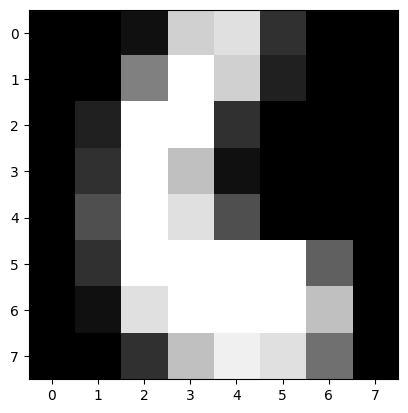

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.gray()
ax.imshow(digits.images[sample_target_ind])
print(digits.target[sample_target_ind])

In [63]:
images = [DigitImage(data, target=target) for data, target in zip(digits.data[:10],digits.target[:10])]
images

[0: [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.],
 1: [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.],
 2: [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.],
 3: [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0.  0.  0.  1. 10. 

In [64]:
target_image = DigitImage(digits.data[sample_target_ind], target=digits.target[sample_target_ind])
correlations = []
max_corr = 0
max_corr_ind = 11
for i, digit in enumerate(images):
    curr = target_image.check_correlation(digit)
    correlations.append(curr)
    if curr > max_corr:
        max_corr = curr
        max_corr_ind = i

correlations
print(images[max_corr_ind])
print(images[max_corr_ind].target == target_image.target)

6: [ 0.  0.  0. 12. 13.  0.  0.  0.  0.  0.  5. 16.  8.  0.  0.  0.  0.  0.
 13. 16.  3.  0.  0.  0.  0.  0. 14. 13.  0.  0.  0.  0.  0.  0. 15. 12.
  7.  2.  0.  0.  0.  0. 13. 16. 13. 16.  3.  0.  0.  0.  7. 16. 11. 15.
  8.  0.  0.  0.  1.  9. 15. 11.  3.  0.]
True
